In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import tkinter as tk
from tkinter import messagebox

In [15]:
data = pd.read_csv('C:\\Users\\Yousuf Traders\\Downloads\\Titanic_data.csv')

# EDA
print("Dataset Information:")
print(data.info())
print("\nMissing values:")
print(data.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin      

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


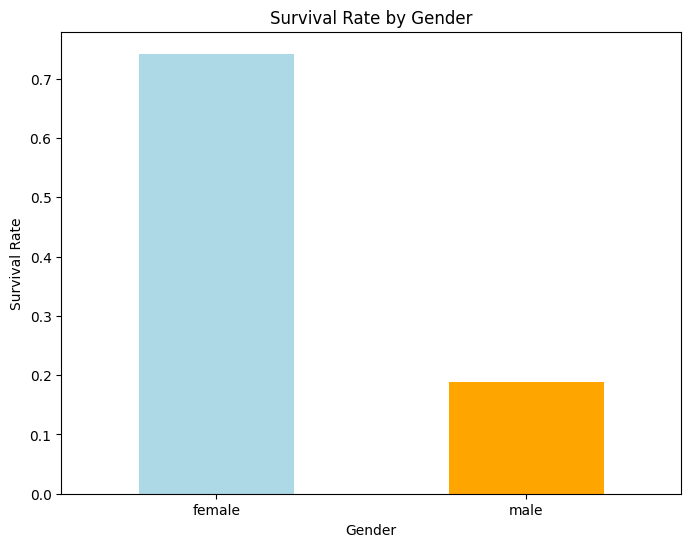

In [16]:
# Survival rate by gender
gender_survival = data.groupby('Sex')['Survived'].mean()
print(gender_survival)
gender_survival.plot(kind='bar', color=['lightblue', 'orange'], figsize=(8, 6))
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

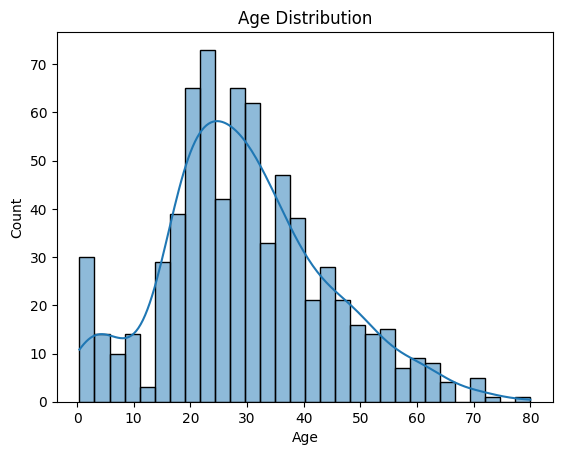

In [17]:
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


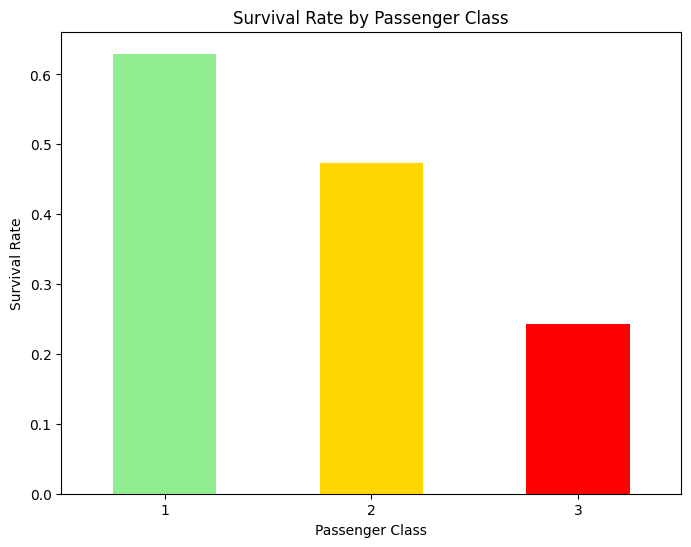

In [18]:
# Survival rate by class
class_survival = data.groupby('Pclass')['Survived'].mean()
print(class_survival)
class_survival.plot(kind='bar', color=['lightgreen', 'gold', 'red'], figsize=(8, 6))
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


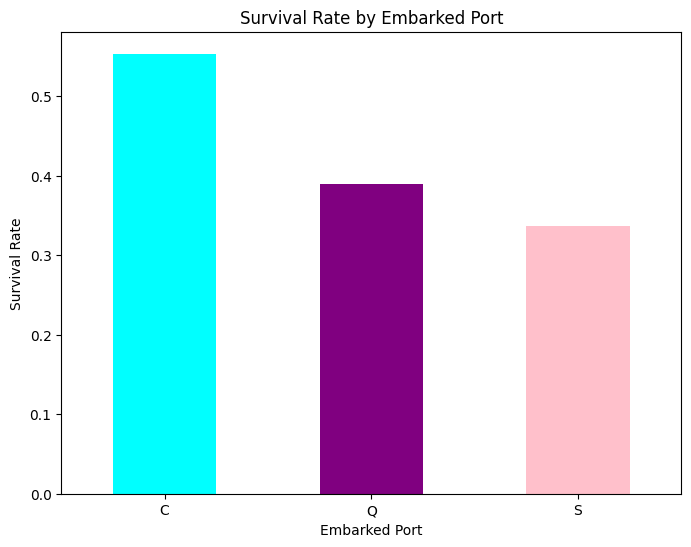

In [19]:
# Survival rate by embarkation port
embarked_survival = data.groupby('Embarked')['Survived'].mean()
print(embarked_survival)
embarked_survival.plot(kind='bar', color=['cyan', 'purple', 'pink'], figsize=(8, 6))
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


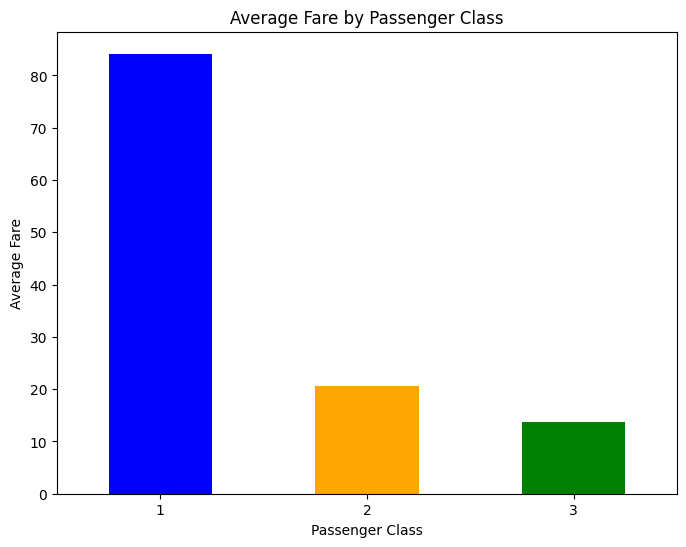

In [20]:
# Average fare by class
class_fare = data.groupby('Pclass')['Fare'].mean()
print(class_fare)
class_fare.plot(kind='bar', color=['blue', 'orange', 'green'], figsize=(8, 6))
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

C:\Users\Yousuf Traders\AppData\Local\Temp\ipykernel_3644\3031470172.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = data.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Child       0.579710
Teenager    0.428571
Adult       0.388788
Elderly     0.227273
Name: Survived, dtype: float64


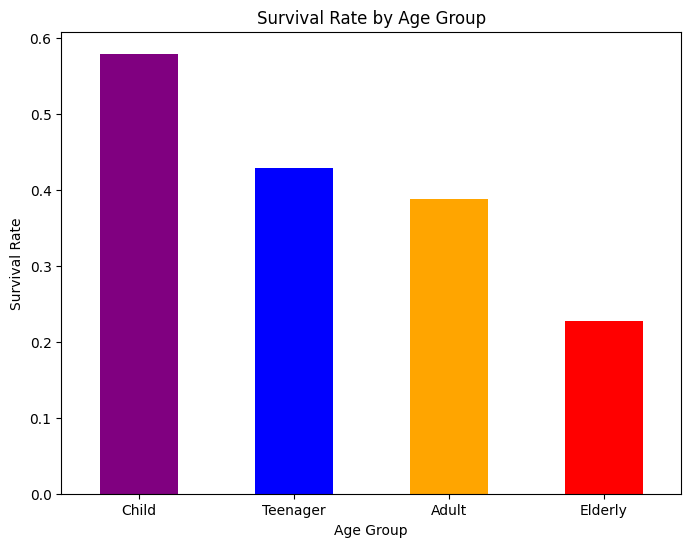

In [21]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Elderly'])
# Survival rate by age group
age_group_survival = data.groupby('AgeGroup')['Survived'].mean()
print(age_group_survival)
age_group_survival.plot(kind='bar', color=['purple', 'blue', 'orange', 'red'], figsize=(8, 6))
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


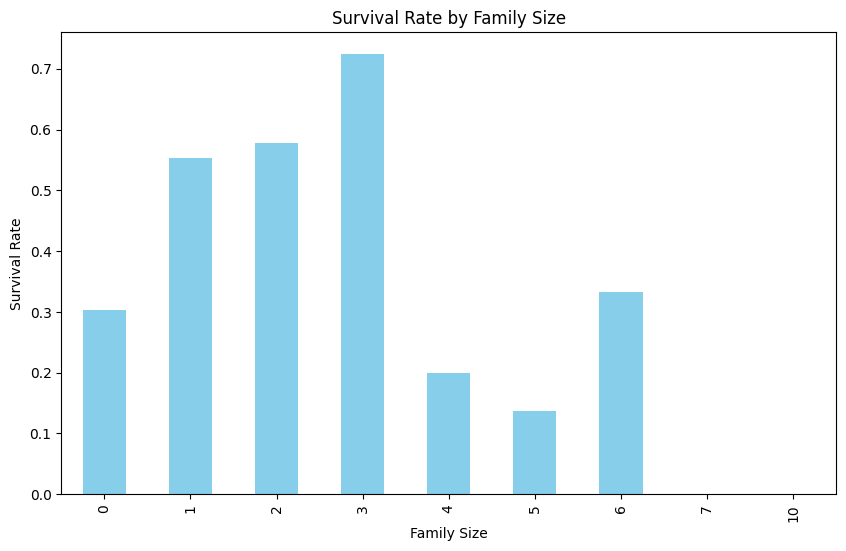

In [22]:
# Survival rate by family size
data['FamilySize'] = data['SibSp'] + data['Parch']
family_survival = data.groupby('FamilySize')['Survived'].mean()
print(family_survival)
family_survival.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


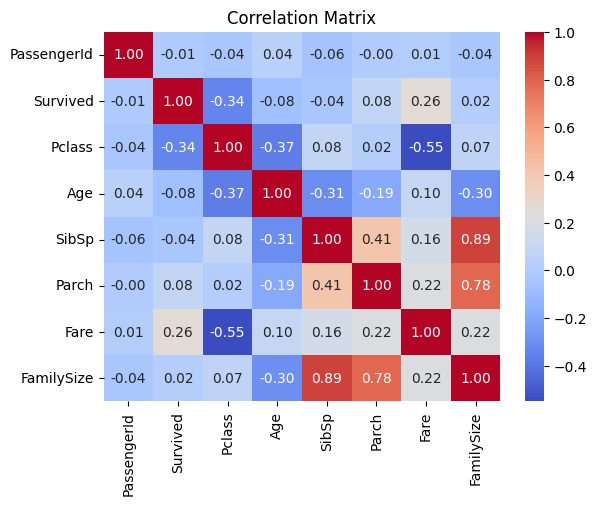

In [23]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [24]:
# Preprocessing
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data = data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1) # Dropping less useful columns

In [26]:
# data prepration
numeric_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Embarked','Sex']  # Exclude 'AgeGroup', 'Sex', 'Embarked', etc.

X = data[numeric_columns]
y = data['Survived']

# Handle missing values (e.g., fill missing age with median or mean)
X['Age'].fillna(X['Age'].median(), inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Data training
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

best_model = None
best_accuracy = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {acc * 100:.2f}%")
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

print("\nBest Model:", best_model)
print("Classification Report:")
print(classification_report(y_test, best_model.predict(X_test)))


C:\Users\Yousuf Traders\AppData\Local\Temp\ipykernel_3644\1156799267.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
C:\Users\Yousuf Traders\AppData\Local\Temp\ipykernel_3644\1156799267.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)


Logistic Regression Accuracy: 80.45%
Random Forest Accuracy: 82.12%
Support Vector Machine Accuracy: 81.56%

Best Model: RandomForestClassifier(random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [27]:
def predict_survival():
    try:
        # Collect input values from the user
        pclass = int(entry_pclass.get())
        sex = int(entry_sex.get())
        age = float(entry_age.get())
        sibsp = int(entry_sibsp.get())
        parch = int(entry_parch.get())
        fare = float(entry_fare.get())
        embarked = int(entry_embarked.get())

        # If extra features like PassengerId are required, add default values here
        # Example: passenger_id = 0 (if it's not being predicted by the model)

        # Ensure the input matches the training feature set
        features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
        
        # Check the expected number of features
        print(f"Expected features: {X.shape[1]}, Provided features: {len(features[0])}")

        # Standardize input features
        features_scaled = scaler.transform(features)

        # Make a prediction
        prediction = best_model.predict(features_scaled)[0]
        result = "Survived" if prediction == 1 else "Not Survived"
        messagebox.showinfo("Prediction Result", f"The passenger is predicted to: {result}")

    except Exception as e:
        messagebox.showerror("Input Error", f"Invalid input: {e}")

# Create Tkinter Window
root = tk.Tk()
root.title("Titanic Survival Prediction")

# Input fields
tk.Label(root, text="Passenger class (1, 2, 3):").grid(row=0, column=0)
entry_pclass = tk.Entry(root)
entry_pclass.grid(row=0, column=1)

tk.Label(root, text="Sex (0: Male, 1: Female):").grid(row=1, column=0)
entry_sex = tk.Entry(root)
entry_sex.grid(row=1, column=1)

tk.Label(root, text="Age:").grid(row=2, column=0)
entry_age = tk.Entry(root)
entry_age.grid(row=2, column=1)

tk.Label(root, text="Sibling / spouse aboard:").grid(row=3, column=0)
entry_sibsp = tk.Entry(root)
entry_sibsp.grid(row=3, column=1)

tk.Label(root, text="Parents / childern aboard:").grid(row=4, column=0)
entry_parch = tk.Entry(root)
entry_parch.grid(row=4, column=1)

tk.Label(root, text="Fare:").grid(row=5, column=0)
entry_fare = tk.Entry(root)
entry_fare.grid(row=5, column=1)

tk.Label(root, text="Embarked (0: C, 1: Q, 2: S):").grid(row=6, column=0)
entry_embarked = tk.Entry(root)
entry_embarked.grid(row=6, column=1)

# Predict button
predict_button = tk.Button(root, text="Predict Survival", command=predict_survival)
predict_button.grid(row=7, column=0, columnspan=2)

# Run the application
root.mainloop()


Expected features: 7, Provided features: 7


c:\Users\Yousuf Traders\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
